In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Replace 'your_file.fits' with the actual path to your FITS file
fits_file_path1 = '502nmos.fits'
fits_file_path2 = '656nmos.fits'
fits_file_path3 = '673nmos.fits'

# Open the FITS file
with fits.open(fits_file_path1) as hdul:
    # Print header information
    header = hdul[0].header
    

    # Access the data
    data_502 = hdul[0].data
    
with fits.open(fits_file_path2) as hdul:
    # Print header information
    header = hdul[0].header
    

    # Access the data
    data_656 = hdul[0].data

with fits.open(fits_file_path3) as hdul:
    # Print header information
    header = hdul[0].header
    

    # Access the data
    data_673 = hdul[0].data
    


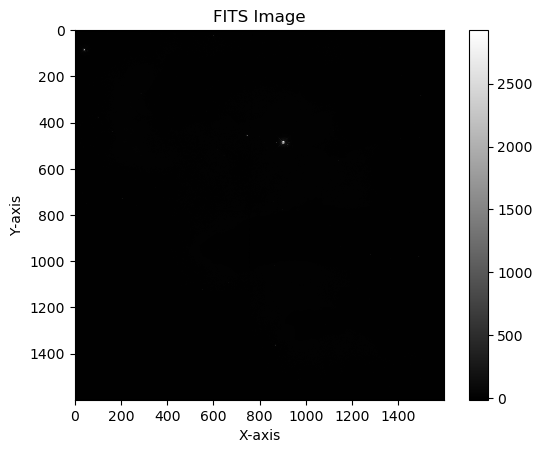

In [3]:
plt.imshow(data_502, cmap='gray')  # You can choose a different colormap if desired
plt.colorbar()  # Add a colorbar to the plot

plt.title('FITS Image')  # Set the title of the plot
plt.xlabel('X-axis')  # Set the label for the x-axis
plt.ylabel('Y-axis')  # Set the label for the y-axis

# Show the plot
plt.show()


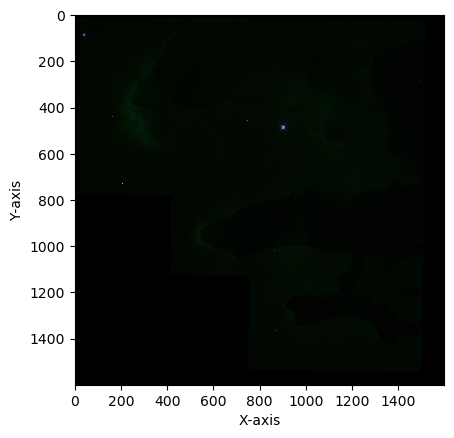

In [81]:
import sys
sys.path[0].split("\\")
new_path = "\\".join(sys.path[0].split("\\")[:-1])
sys.path.append(new_path)
from CelestialCanvas.image import Image
from CelestialCanvas.composite import Composite

image_red = Image(data_502)
image_green = Image(data_656)
image_blue = Image(data_673)
comp_image = Composite(image_red,image_green,image_blue)
comp_image.plot()

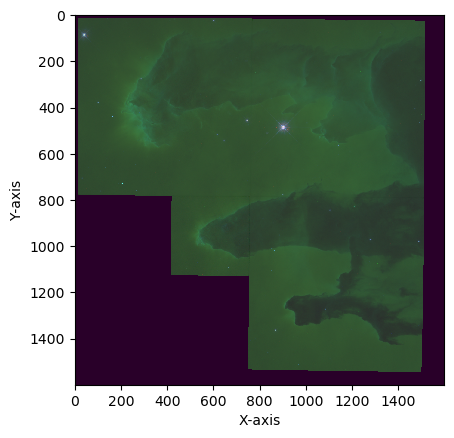

In [91]:
comp_image.green.reset()
comp_image.blue.reset()
comp_image.red.reset()

comp_image.blue.normalize()
comp_image.red.normalize()
comp_image.green.rescale_root(3)
comp_image.blue.rescale_root(3)
comp_image.red.rescale_root(3)
comp_image.plot()

In [79]:
np.where(comp_image.blue.rescaled_data<0)[1]

array([ 766,  767,  768,  769,  770,  765,  766,  767,  768,  769,  770,
        765,  766,  767,  768,  769,  765,  766,  767,  768,  769,  765,
        766,  767,  768,  769,  765,  766,  767,  768,  766,  767,   13,
         14,   13,   14,   15,   16,   17,   13,   14,   15,   16,   17,
         13,   14,   15,   16,   17,   18,   13,   14,   15,   16,   17,
         18,  425,  427,  432,  440,  441,  447,  452,  456,  458,  459,
        462,  463,  470,  471,  472,  473,  475,  476,  482,  487,  488,
        489,  491,  492,  493,  497,  512,  516,  440,  456,  458,  462,
        470,  471,  472,  473,  474,  475,  476,  482,  486,  487,  489,
        490,  491,  492,  497,  511,  512,  515,  516,  517,  528,  531,
        533,  546,  547,  550,  551,  552,  553,  560,  561,  562,  563,
        570,  579,  580,  590,  592,  593,  607,  579,  629,  642,  643,
        644,  648,  657,  658,  659,  660,  686,  687,  688,  695,  705,
        708,  710,  712,  713,  714,  716,  717,  7

-15.075414

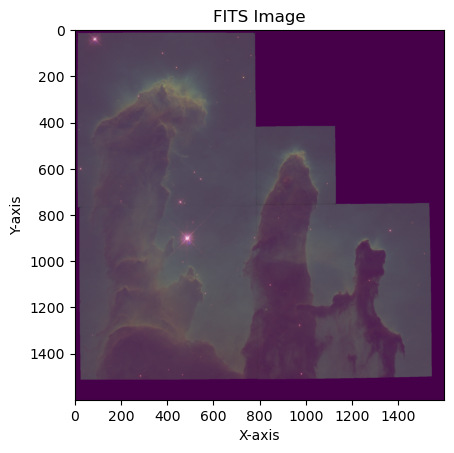

In [133]:
  # You can choose a different colormap if desired
#data_502 = np.arcsinh(data_502)
#data_673=data_673-data_673.min()
#data_673= np.log(1.+data_673)

#data_502=data_502-data_502.min()
#data_502= np.log(1.+data_502)

#data_656=data_656-data_656.min()
#data_656= np.log(1.+data_656)

normalized_blue = (data_502 - data_502.min()) / (data_502.max() - data_502.min())
normalized_green = (data_656 - data_656.min()) / (data_656.max() - data_656.min())
normalized_red = (data_673 - data_673.min()) / (data_673.max() - data_673.min())
rgb_image = np.dstack((normalized_red.transpose()**1.2,normalized_green.transpose()**2.3,normalized_blue.transpose()**1.1))
#rgb_image = np.flipud(rgb_image)
plt.imshow(rgb_image, cmap='gray')
plt.title('FITS Image')  # Set the title of the plot
plt.xlabel('X-axis')  # Set the label for the x-axis
plt.ylabel('Y-axis')  # Set the label for the y-axis

# Show the plot
plt.show()

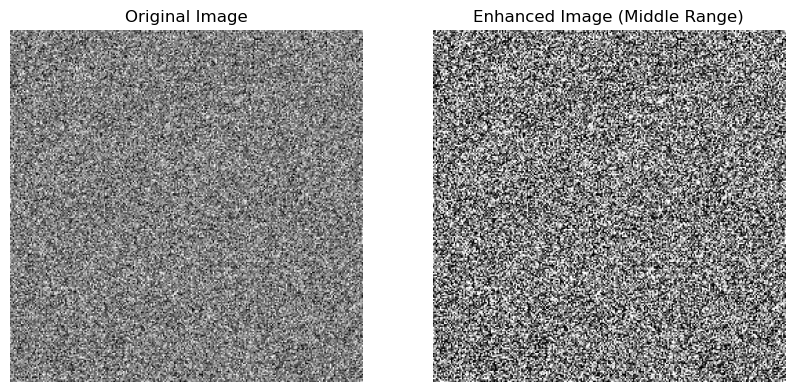

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image, min_percentile=10, max_percentile=90):
    """
    Apply contrast stretching to enhance the middle intensity range.
    """
    min_value = np.percentile(image, min_percentile)
    max_value = np.percentile(image, max_percentile)
    stretched_image = np.clip((image - min_value) / (max_value - min_value), 0, 1)
    return stretched_image

# Generate a sample image with a peak in the middle range
image = np.random.normal(loc=0.5, scale=0.2, size=(256, 256))
image[image < 0] = 0
image[image > 1] = 1

# Apply contrast stretching
enhanced_image = contrast_stretching(image)

# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray', vmin=0, vmax=1)
plt.title('Enhanced Image (Middle Range)')
plt.axis('off')

plt.show()


In [135]:
np.where((data_673<0)==True)

(array([], dtype=int64), array([], dtype=int64))

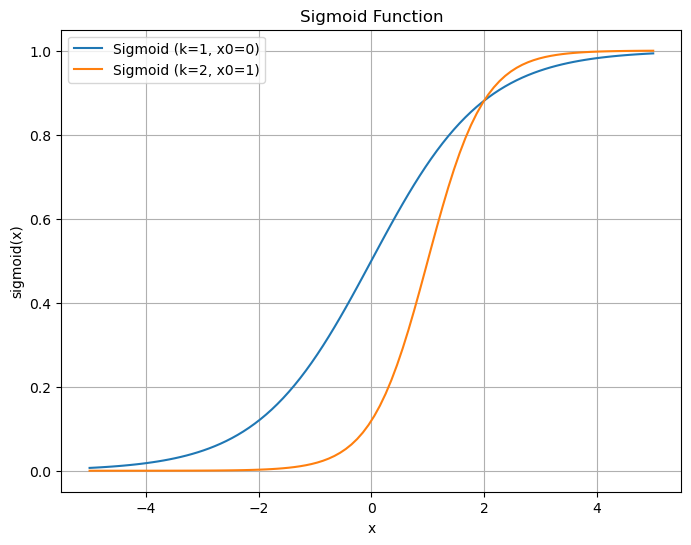

In [136]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, k=1, x0=0):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Calculate sigmoid values for default parameters (k=1, x0=0)
sigmoid_values_default = sigmoid(x_values)

# Calculate sigmoid values for customized parameters
sigmoid_values_custom = sigmoid(x_values, k=2, x0=1)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, sigmoid_values_default, label='Sigmoid (k=1, x0=0)')
plt.plot(x_values, sigmoid_values_custom, label='Sigmoid (k=2, x0=1)')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
class image:
    def __init__(self, data ): # wavelength
        self.data = data
        #self.wavelength=wavelength
        self.rescaled_data = data
        
        
    def reset(self): 
        self.rescaled_data = self.data
        return self.data
        
        
    def normalize(self):
        self.rescaled_data=(self.rescaled_data - self.rescaled_data.min()) / (self.rescaled_data.max() - self.rescaled_data.min())
        return self.rescaled_data
    
    def rescale_root(self,root):
        self.rescaled_data = self.rescaled_data**(1/root)
        return self.rescaled_data
    
    def rotate(self):
        #?????????transpose,np.flipud,np.fliplr
    
    def plot(self):
        plt.imshow(self.normalize(), cmap='gray')
        plt.title('FITS Image')  # Set the title of the plot
        plt.xlabel('X-axis')  # Set the label for the x-axis
        plt.ylabel('Y-axis')  # Set the label for the y-axis

        plt.show()
    
        
    
# Creating an instance of the class
#my_instance = MyClass(attribute1_value, attribute2_value)

# Accessing attributes and calling methods
#my_instance.my_method()

In [165]:
i= image(data_673.transpose())

In [167]:
i= image(np.fliplr(data_673))

In [169]:
i= image(data_673)

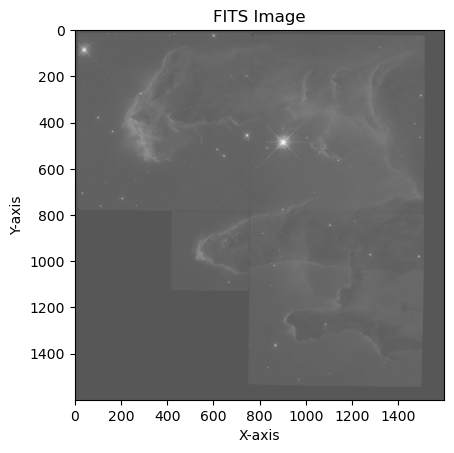

In [170]:
i.plot()